# Livro para consulta:
- https://jakevdp.github.io/PythonDataScienceHandbook/03.08-aggregation-and-grouping.html
- https://jakevdp.github.io/PythonDataScienceHandbook/03.09-pivot-tables.html
    

# 1. Importando bibliotecas <a name="import"></a>

<div style="text-align: right"
     
[Voltar ao índice](#Contents)

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

# 2. Carregando o dataframe SINASC <a name="read"></a>
<div style="text-align: right"
     
[Voltar ao índice](#Contents)

In [19]:
sinasc_raw = pd.read_csv('SINASC_RO_2019.csv')
sinasc_raw.head()

,ORIGEM,CODESTAB,CODMUNNASC,LOCNASC,IDADEMAE,ESTCIVMAE,ESCMAE,CODOCUPMAE,QTDFILVIVO,QTDFILMORT,...,KOTELCHUCK,CONTADOR,munResStatus,munResTipo,munResNome,munResUf,munResLat,munResLon,munResAlt,munResArea
0,1,2679477.0,110001,1,19,5.0,8 a 11 anos,NaN,0.0,0.0,...,5,1,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
1,1,2679477.0,110001,1,29,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,2,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
2,1,2679477.0,110001,1,37,9.0,8 a 11 anos,513205.0,2.0,0.0,...,5,3,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
3,1,2516500.0,110001,1,30,5.0,12 anos ou mais,231205.0,0.0,0.0,...,4,4,ATIVO,MUNIC,Alto Alegre dos Parecis,Rondônia,-12.13178,-61.85308,397.0,3958.273
4,1,2516500.0,110001,1,30,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,5,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025


In [20]:
# VER COLUNAS DISPONÍVEIS
#sinasc_raw.columns

# IDENTIFICAR QUAIS COLUNAS SÃO NUMÉRICAS
#variaveis_numericas = sinasc_raw.select_dtypes(include='number')
#print(variaveis_numericas)

Index(['ORIGEM', 'CODESTAB', 'CODMUNNASC', 'LOCNASC', 'IDADEMAE', 'ESTCIVMAE',
       'ESCMAE', 'CODOCUPMAE', 'QTDFILVIVO', 'QTDFILMORT', 'CODMUNRES',
       'GESTACAO', 'GRAVIDEZ', 'PARTO', 'CONSULTAS', 'DTNASC', 'HORANASC',
       'SEXO', 'APGAR1', 'APGAR5', 'RACACOR', 'PESO', 'IDANOMAL', 'DTCADASTRO',
       'CODANOMAL', 'NUMEROLOTE', 'VERSAOSIST', 'DTRECEBIM', 'DIFDATA',
       'DTRECORIGA', 'NATURALMAE', 'CODMUNNATU', 'CODUFNATU', 'ESCMAE2010',
       'SERIESCMAE', 'DTNASCMAE', 'RACACORMAE', 'QTDGESTANT', 'QTDPARTNOR',
       'QTDPARTCES', 'IDADEPAI', 'DTULTMENST', 'SEMAGESTAC', 'TPMETESTIM',
       'CONSPRENAT', 'MESPRENAT', 'TPAPRESENT', 'STTRABPART', 'STCESPARTO',
       'TPNASCASSI', 'TPFUNCRESP', 'TPDOCRESP', 'DTDECLARAC', 'ESCMAEAGR1',
       'STDNEPIDEM', 'STDNNOVA', 'CODPAISRES', 'TPROBSON', 'PARIDADE',
       'KOTELCHUCK', 'CONTADOR', 'munResStatus', 'munResTipo', 'munResNome',
       'munResUf', 'munResLat', 'munResLon', 'munResAlt', 'munResArea'],
      dtype='object')

# Tarefa 2

### 1. Crie 2 faixas de Latitude do município (munResLat) sendo uma acima e outra abaixo de -10.5 e aplique o groupby usando essas faixas como chave e realize operações de soma, media, minimo, maximo, mediana, desvio padrao, variancia pra pelo menos 2 variáveis numéricas ainda não utilizadas

In [7]:
# Exercício 1
faixas_lat = pd.cut(sinasc_raw['munResLat'], bins=[-np.inf, -10.5, np.inf], labels=['Abaixo de -10.5', 'Acima de -10.5'])
grouped_lat = sinasc_raw.groupby(faixas_lat)
resultado_exercicio1 = grouped_lat.agg({
    'QTDFILVIVO': ['sum', 'mean', 'min', 'max', 'median', 'std', 'var'],
    'QTDFILMORT': ['sum', 'mean', 'min', 'max', 'median', 'std', 'var']
})

print("Exercício 1:")
print(resultado_exercicio1)

Exercício 1:
                QTDFILVIVO                                                  \
                       sum      mean  min   max median       std       var   
munResLat                                                                    
Abaixo de -10.5    12600.0  0.980011  0.0  30.0    1.0  1.138300  1.295727   
Acima de -10.5     14226.0  1.129317  0.0  12.0    1.0  1.198613  1.436674   

                QTDFILMORT                                                  
                       sum      mean  min   max median       std       var  
munResLat                                                                   
Abaixo de -10.5     3105.0  0.242521  0.0  28.0    0.0  0.599430  0.359317  
Acima de -10.5      3538.0  0.291770  0.0   9.0    0.0  0.627856  0.394204  


### 2. Crie 2 faixas da área dos municípios (munResArea) sendo uma acima e outra abaixo de 3000 e aplique o groupby usando essas faixas como chave e realize operações de soma, media, minimo, maximo, mediana, desvio padrao, variancia pra pelo menos 2 variáveis numéricas ainda não utilizadas


In [11]:
# Exercício 2 - Parte 1
faixas_latitude = pd.cut(sinasc_raw['munResLat'], bins=[-np.inf, -10.5, np.inf], labels=['Abaixo de -10.5', 'Acima de -10.5'])
grouped_latitude = sinasc_raw.groupby(faixas_latitude)
resultado_exercicio2_parte1 = grouped_latitude.agg({
    'CONSULTAS': ['sum', 'mean', 'min', 'max', 'median', 'std', 'var'],
    'APGAR1': ['sum', 'mean', 'min', 'max', 'median', 'std', 'var']
})

print("\nExercício 2 - Parte 1:")
print(resultado_exercicio2_parte1)


Exercício 2 - Parte 1:
                CONSULTAS                                               \
                      sum      mean min max median       std       var   
munResLat                                                                
Abaixo de -10.5     48000  3.694297   1   9    4.0  0.643372  0.413928   
Acima de -10.5      48662  3.467436   1   9    4.0  0.888240  0.788970   

                   APGAR1                                                  
                      sum      mean  min   max median       std       var  
munResLat                                                                  
Abaixo de -10.5  104590.0  8.070216  0.0  10.0    8.0  0.960767  0.923073  
Acima de -10.5   114559.0  8.199771  0.0  10.0    8.0  1.002839  1.005686  


### 3. Determine faixas na variável munResAlt e aplique o groupby usando essas faixas como chave e realize operações de soma, media, minimo, maximo, mediana, desvio padrao, variancia pra pelo menos 2 variáveis numéricas ainda não utilizadas

In [15]:
# Criando as faixas de Altitude
faixas_altitude = pd.cut(sinasc_raw['munResAlt'], bins=[-np.inf, 500, 1000, 1500, np.inf], 
                         labels=['Até 500', '501 a 1000', '1001 a 1500', 'Acima de 1500'])

# Preenchendo valores NaN com 0 nas colunas relevantes
sinasc_raw['QTDGESTANT'].fillna(0, inplace=True)
sinasc_raw['QTDPARTCES'].fillna(0, inplace=True)

# Agrupando os dados pelas faixas de Altitude
grouped_altitude = sinasc_raw.groupby(faixas_altitude)

# Realizando as operações de agregação para as variáveis QTDGESTANT e QTDPARTCES
resultado_exercicio3 = grouped_altitude.agg({
    'QTDGESTANT': ['sum', 'mean', 'min', 'max', 'median', 'std', 'var'],
    'QTDPARTCES': ['sum', 'mean', 'min', 'max', 'median', 'std', 'var']
})

# Substituindo possíveis NaN por 0 nas estatísticas calculadas
resultado_exercicio3.fillna(0, inplace=True)

print("Exercício 3:")
print(resultado_exercicio3)


Exercício 3:
              QTDGESTANT                                                  \
                     sum      mean  min   max median       std       var   
munResAlt                                                                  
Até 500          31103.0  1.222746  0.0  52.0    1.0  1.408502  1.983878   
501 a 1000        1813.0  1.140252  0.0   9.0    1.0  1.213446  1.472451   
1001 a 1500          0.0  0.000000  0.0   0.0    0.0  0.000000  0.000000   
Acima de 1500        0.0  0.000000  0.0   0.0    0.0  0.000000  0.000000   

              QTDPARTCES                                                  
                     sum      mean  min   max median       std       var  
munResAlt                                                                 
Até 500          12198.0  0.479538  0.0  12.0    0.0  0.730908  0.534227  
501 a 1000         938.0  0.589937  0.0   4.0    0.0  0.753694  0.568055  
1001 a 1500          0.0  0.000000  0.0   0.0    0.0  0.000000  0.000000  
Acim

### 4. Plote no mesmo grafico ao longo do tempo a idade media das mulheres de cada regiao imediatas de rondonia
https://pt.wikipedia.org/wiki/Lista_de_regi%C3%B5es_geogr%C3%A1ficas_intermedi%C3%A1rias_e_imediatas_de_Rond%C3%B4nia

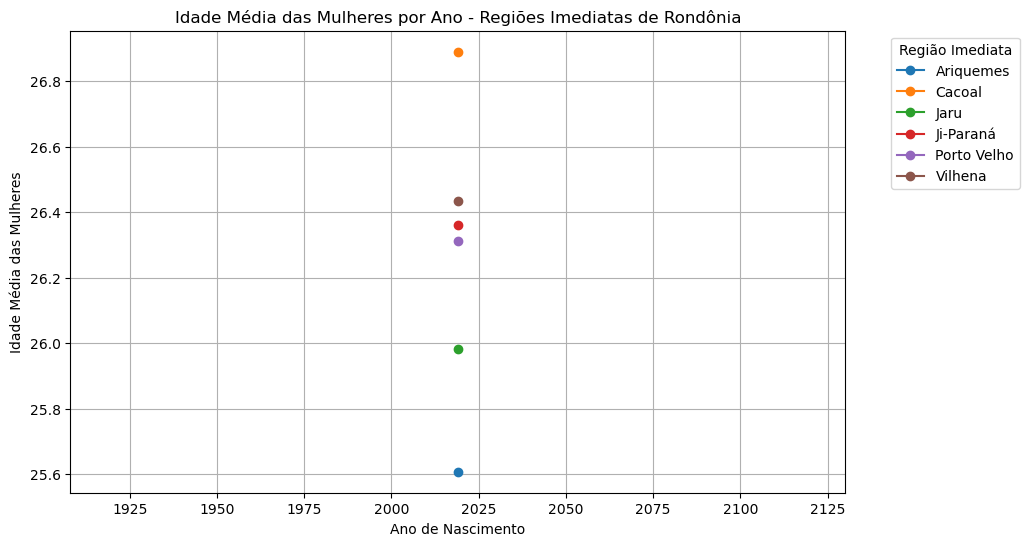

In [29]:
# Municípios das regiões imediatas de Rondônia
municipios_regioes_imediatas = [
    'Porto Velho', 'Ariquemes', 'Jaru', 'Ji-Paraná', 'Cacoal', 'Vilhena'
]

# Filtrando o DataFrame para incluir apenas os municípios das regiões imediatas
sinasc_filtered = sinasc_raw[sinasc_raw['munResNome'].isin(municipios_regioes_imediatas)].copy()

# Convertendo a coluna 'DTNASC' para o tipo de data
sinasc_filtered['DTNASC'] = pd.to_datetime(sinasc_filtered['DTNASC'], format='%Y-%m-%d')

# Calculando a idade média das mulheres para cada ano e região imediata
sinasc_filtered['IDADEMAE'] = pd.to_numeric(sinasc_filtered['IDADEMAE'], errors='coerce')
idade_media_por_ano_regiao = sinasc_filtered.groupby([sinasc_filtered['DTNASC'].dt.year, 'munResNome'])['IDADEMAE'].mean().unstack()

# Plotando o gráfico
plt.figure(figsize=(10, 6))
for regiao in idade_media_por_ano_regiao.columns:
    plt.plot(idade_media_por_ano_regiao.index, idade_media_por_ano_regiao[regiao], marker='o', label=regiao)

plt.title('Idade Média das Mulheres por Ano - Regiões Imediatas de Rondônia')
plt.xlabel('Ano de Nascimento')
plt.ylabel('Idade Média das Mulheres')
plt.grid(True)
plt.legend(title='Região Imediata', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


### 5. Utilize a tabela do link abaixo e crie faixas utilizando o mapping e gere agrupamentos utilizando essas faixas como chave


### 5.1 IDH
A - https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_IDH-M


In [35]:
import pandas as pd

# Dados do IDH por município
dados_idh = {
    'Município': [
        'Porto Velho', 'Vilhena', 'Cacoal', 'Ji-Paraná', 'Pimenta Bueno', 'Ariquemes', 'Rolim de Moura',
        'Cerejeiras', 'Jaru', 'Colorado do Oeste', 'Ouro Preto do Oeste', 'Espigão d\'Oeste', 'Santa Luzia d\'Oeste',
        'Pimenteiras do Oeste', 'Presidente Médici', 'Castanheiras', 'Guajará-Mirim', 'Chupinguaia', 'Cabixi',
        'Candeias do Jamari', 'São Felipe d\'Oeste', 'Cacaulândia', 'São Miguel do Guaporé', 'Mirante da Serra',
        'Alvorada d\'Oeste', 'Teixeirópolis', 'Nova Brasilândia d\'Oeste', 'Rio Crespo', 'Primavera de Rondônia',
        'Alta Floresta d\'Oeste', 'Ministro Andreazza', 'Novo Horizonte do Oeste', 'Vale do Paraíso', 'Alto Paraíso',
        'Parecis', 'Buritis', 'Itapuã do Oeste', 'Corumbiara', 'Cujubim', 'Costa Marques', 'São Francisco do Guaporé',
        'Urupá', 'Monte Negro', 'Seringueiras', 'Governador Jorge Teixeira', 'Machadinho d\'Oeste',
        'Campo Novo de Rondônia', 'Alto Alegre dos Parecis', 'Theobroma', 'Nova União', 'Nova Mamoré', 'Vale do Anari'
    ],
    'IDH municipal': [
        0.736, 0.731, 0.718, 0.714, 0.710, 0.702, 0.700, 0.692, 0.689, 0.685, 0.682, 0.672, 0.670, 0.665, 0.664,
        0.658, 0.657, 0.652, 0.650, 0.649, 0.649, 0.649, 0.646, 0.646, 0.643, 0.643, 0.643, 0.643, 0.643, 0.643,
        0.641, 0.641, 0.638, 0.634, 0.627, 0.625, 0.617, 0.616, 0.614, 0.613, 0.612, 0.611, 0.611, 0.609, 0.607,
        0.598, 0.596, 0.596, 0.593, 0.592, 0.589, 0.587, 0.587, 0.584
    ]
}

# Garantir que as listas têm o mesmo número de elementos
min_length = min(len(dados_idh['Município']), len(dados_idh['IDH municipal']))
dados_idh['Município'] = dados_idh['Município'][:min_length]
dados_idh['IDH municipal'] = dados_idh['IDH municipal'][:min_length]

# Criar um DataFrame com os dados de IDH
df_idh = pd.DataFrame(dados_idh)

# Definir os intervalos para as faixas de IDH
intervalos = [0, 0.5, 0.6, 0.7, 0.8, 1]

# Definir os labels para as faixas de IDH
labels = ['Muito Baixo', 'Baixo', 'Médio', 'Alto', 'Muito Alto']

# Criar uma nova coluna no DataFrame com as faixas de IDH
df_idh['Faixa IDH'] = pd.cut(df_idh['IDH municipal'], bins=intervalos, labels=labels, right=False)

# Gerar agrupamentos utilizando as faixas de IDH como chave
agrupamentos = df_idh.groupby('Faixa IDH')

# Exibir os agrupamentos
for faixa, grupo in agrupamentos:
    print(f'Faixa de IDH: {faixa}')
    print(grupo[['Município', 'IDH municipal']])
    print('\n')


Faixa de IDH: Muito Baixo
Empty DataFrame
Columns: [Município, IDH municipal]
Index: []


Faixa de IDH: Baixo
                  Município  IDH municipal
45       Machadinho d'Oeste          0.598
46   Campo Novo de Rondônia          0.596
47  Alto Alegre dos Parecis          0.596
48                Theobroma          0.593
49               Nova União          0.592
50              Nova Mamoré          0.589
51            Vale do Anari          0.587


Faixa de IDH: Médio
                    Município  IDH municipal
7                  Cerejeiras          0.692
8                        Jaru          0.689
9           Colorado do Oeste          0.685
10        Ouro Preto do Oeste          0.682
11            Espigão d'Oeste          0.672
12        Santa Luzia d'Oeste          0.670
13       Pimenteiras do Oeste          0.665
14          Presidente Médici          0.664
15               Castanheiras          0.658
16              Guajará-Mirim          0.657
17                Chupinguaia

### 5.2 IFDM 
B - https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_IFDM


In [45]:
import pandas as pd

# Dados do IFDM por município
dados_ifdm = {
    'Município': ['Ariquemes', 'Vilhena', 'Pimenta Bueno', 'Porto Velho', 'Ji-Paraná', 'Cacoal', 'Santa Luzia d\'Oeste', 'Rolim de Moura', 'Chupinguaia', 'São Miguel do Guaporé', 'Pimenteiras do Oeste', 'Teixeirópolis', 'Colorado do Oeste', 'Jaru', 'Rio Crespo', 'Primavera de Rondônia', 'Alta Floresta d\'Oeste', 'Ouro Preto do Oeste', 'São Francisco do Guaporé', 'Candeias do Jamari', 'Buritis', 'São Felipe d\'Oeste', 'Presidente Médici', 'Cerejeiras', 'Monte Negro', 'Urupá', 'Espigão d\'Oeste', 'Seringueiras', 'Alvorada d\'Oeste', 'Itapuã do Oeste', 'Cabixi', 'Novo Horizonte do Oeste', 'Nova Brasilândia d\'Oeste', 'Vale do Paraíso', 'Corumbiara', 'Alto Paraíso', 'Cacaulândia', 'Vale do Anari', 'Ministro Andreazza', 'Costa Marques', 'Nova União', 'Guajará-Mirim', 'Mirante da Serra', 'Parecis', 'Castanheiras', 'Theobroma', 'Machadinho d\'Oeste', 'Campo Novo de Rondônia', 'Nova Mamoré', 'Cujubim', 'Alto Alegre dos Parecis', 'Governador Jorge Teixeira'],
    'IFDM': [0.7746, 0.7465, 0.7383, 0.7257, 0.7117, 0.7111, 0.6850, 0.6785, 0.6766, 0.6699, 0.6501, 0.6500, 0.6473, 0.6450, 0.6430, 0.6384, 0.6337, 0.6261, 0.6214, 0.6199, None, 0.6153, 0.6140, 0.6137, 0.6016, 0.6006, 0.5973, 0.5922, 0.5919, 0.5903, 0.5887, 0.5858, 0.5857, 0.5818, 0.5759, 0.5735, 0.5721, 0.5710, 0.5657, 0.5626, 0.5571, 0.5541, 0.5519, 0.5502, 0.5430, 0.5405, 0.5322, 0.5272, 0.5084, 0.5055, 0.5046, 0.4562]
}

# Garantir que as listas têm o mesmo número de elementos
min_length = min(len(dados_ifdm['Município']), len(dados_ifdm['IFDM']))
dados_ifdm['Município'] = dados_ifdm['Município'][:min_length]
dados_ifdm['IFDM'] = dados_ifdm['IFDM'][:min_length]

# Criar um DataFrame com os dados de IFDM
df_ifdm = pd.DataFrame(dados_ifdm)

# Definir os intervalos para as faixas de IFDM
intervalos = [0, 0.4, 0.6, 0.8, 1]

# Definir os labels para as faixas de IFDM
labels = ['Desenvolvimento baixo', 'Desenvolvimento regular', 'Desenvolvimento moderado', 'Desenvolvimento alto']

# Criar uma nova coluna no DataFrame com as faixas de IFDM
df_ifdm['Faixa IFDM'] = pd.cut(df_ifdm['IFDM'], bins=intervalos, labels=labels, right=False)

# Gerar agrupamentos utilizando as faixas de IFDM como chave
agrupamentos = df_ifdm.groupby('Faixa IFDM')

# Exibir os agrupamentos
for faixa, grupo in agrupamentos:
    print(f'Faixa de IFDM: {faixa}')
    print(grupo[['Município', 'IFDM']])
    print('\n')


Faixa de IFDM: Desenvolvimento baixo
Empty DataFrame
Columns: [Município, IFDM]
Index: []


Faixa de IFDM: Desenvolvimento regular
                    Município    IFDM
26            Espigão d'Oeste  0.5973
27               Seringueiras  0.5922
28           Alvorada d'Oeste  0.5919
29            Itapuã do Oeste  0.5903
30                     Cabixi  0.5887
31    Novo Horizonte do Oeste  0.5858
32   Nova Brasilândia d'Oeste  0.5857
33            Vale do Paraíso  0.5818
34                 Corumbiara  0.5759
35               Alto Paraíso  0.5735
36                Cacaulândia  0.5721
37              Vale do Anari  0.5710
38         Ministro Andreazza  0.5657
39              Costa Marques  0.5626
40                 Nova União  0.5571
41              Guajará-Mirim  0.5541
42           Mirante da Serra  0.5519
43                    Parecis  0.5502
44               Castanheiras  0.5430
45                  Theobroma  0.5405
46         Machadinho d'Oeste  0.5322
47     Campo Novo de Rondônia  0.

### 5.3 PIB
C - https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_PIB


In [56]:
import pandas as pd

# Dados do PIB por município
dados_pib = {
    'Município': ['Porto Velho', 'Ji-Paraná', 'Vilhena', 'Ariquemes', 'Cacoal', 'Jaru', 'Rolim de Moura', 'Pimenta Bueno', 'Guajará-Mirim', 'Ouro Preto do Oeste', 'Buritis', 'Machadinho do Oeste', 'Espigão d\'Oeste', 'São Miguel do Guaporé', 'Candeias do Jamari', 'Nova Mamoré', 'Cerejeiras', 'Alta Floresta do Oeste', 'Presidente Médici', 'Cujubim', 'Nova Brasilândia do Oeste', 'Alto Paraíso', 'São Francisco do Guaporé', 'Colorado do Oeste', 'Monte Negro', 'Alto Alegre dos Parecis', 'Campo Novo de Rondônia', 'Alvorada do Oeste', 'Chupinguaia', 'Corumbiara', 'Ministro Andreazza', 'Urupá', 'Costa Marques', 'Seringueiras', 'Mirante da Serra', 'Governador Jorge Teixeira', 'Theobroma', 'Santa Luzia do Oeste', 'Novo Horizonte do Oeste', 'Itapuã do Oeste', 'Vale do Paraíso', 'Cacaulândia', 'Cabixi', 'Vale do Anari', 'Rio Crespo', 'Nova União', 'Parecis', 'Pimenteiras do Oeste', 'Teixeirópolis', 'São Felipe do Oeste', 'Castanheiras', 'Primavera de Rondônia'],
    'PIB': [17912070000, 3783972000, 2831175000, 2579830000, 2261644000, 1500890000, 1283434000, 1164877000, 893000000, 834000000, 726000000, 633000000, 625000000, 616000000, 548000000, 529000000, 507000000, 496000000, 428000000, 385000000, 360000000, 358000000, 353000000, 335000000, 219152000, 213410000, 208821000, 204098000, 190331000, 188218000, 174633000, 172143000, 171878000, 169429000, 163955000, 148027000, 140601000, 135934000, 129399000, 129351000, 116742000, 116635000, 113031000, 105208000, 76854000, 92346000, 80759000, 76756000, 72089000, 72084000, 59779000, 52908000]
}

# Garantir que as listas têm o mesmo número de elementos
min_length = min(len(dados_pib['Município']), len(dados_pib['PIB']))
dados_pib['Município'] = dados_pib['Município'][:min_length]
dados_pib['PIB'] = dados_pib['PIB'][:min_length]

# Criar um DataFrame com os dados de PIB
df_pib = pd.DataFrame(dados_pib)

# Ordenar os dados do PIB antes de definir os intervalos das faixas
df_pib.sort_values(by='PIB', inplace=True)

# Definir os intervalos para as faixas de PIB
intervalos_pib = [0, 100_000_000, 200_000_000, 300_000_000, 500_000_000, 1_000_000_000, float('inf')]

# Definir os labels para as faixas de PIB
labels_pib = ['Até 100 Milhões', 'Acima de 100 Milhões e até 200 Milhões', 'Acima de 200 Milhões e até 300 Milhões', 'Acima de 300 Milhões e até 500 Milhões', 'Acima de 500 Milhões e até 1 Bilhão', 'Acima de 1 Bilhão']

# Criar uma nova coluna no DataFrame com as faixas de PIB
df_pib['Faixa PIB'] = pd.cut(df_pib['PIB'], bins=intervalos_pib, labels=labels_pib, right=False)

# Gerar agrupamentos utilizando as faixas de PIB como chave
agrupamentos_pib = df_pib.groupby('Faixa PIB')

# Exibir os agrupamentos
for faixa, grupo in agrupamentos_pib:
    print(f'Faixa de PIB: {faixa}')
    print(grupo[['Município', 'PIB']])
    print('\n')


Faixa de PIB: Até 100 Milhões
                Município       PIB
51  Primavera de Rondônia  52908000
50           Castanheiras  59779000
49    São Felipe do Oeste  72084000
48          Teixeirópolis  72089000
47   Pimenteiras do Oeste  76756000
44             Rio Crespo  76854000
46                Parecis  80759000
45             Nova União  92346000


Faixa de PIB: Acima de 100 Milhões e até 200 Milhões
                    Município        PIB
43              Vale do Anari  105208000
42                     Cabixi  113031000
41                Cacaulândia  116635000
40            Vale do Paraíso  116742000
39            Itapuã do Oeste  129351000
38    Novo Horizonte do Oeste  129399000
37       Santa Luzia do Oeste  135934000
36                  Theobroma  140601000
35  Governador Jorge Teixeira  148027000
34           Mirante da Serra  163955000
33               Seringueiras  169429000
32              Costa Marques  171878000
31                      Urupá  172143000
30         Minist

### Analise as respostas encontradas, tire algum insight delas, conte pra gente algo encontrado nos dados.

Exemplo:
- Ah, descobri que a idade mediana das mulheres que deram a luz no ano de 2019 dos municipios com o PIB mais alto é a maior dentre todas.

**RESPOSTA:**

*Cruzei a informação do Código abaixo com o IFDM e tive o seguinte insight:*

* Há uma relação entre o IFDM e os nascimentos, pois municípios com maior desenvolvimento geralmente têm mais bebês nascidos, enquanto os de baixo desenvolvimento têm menos nascimentos, isso pode estar relacionado a melhor condições de saúde, acesso a serviços de maternidade e planejamento familiar. Podemos notar desigualdades regionais, municípios com IFDM baixo têm menos nascimentos, indicando desafios socioeconômicos e de acesso a serviços de saúde nessas áreas, já municípios com IFDM alto  apresentam quantidade significativa de nascimento, sugerindo que existem boas condições de vida e uma maior atração de famílias para essas localidades.

In [62]:
municipios_df = pd.DataFrame({
    'Município': ["Espigão d'Oeste", "Seringueiras", "Alvorada d'Oeste", "Itapuã do Oeste", "Cabixi", "Novo Horizonte do Oeste",
                  "Nova Brasilândia d'Oeste", "Vale do Paraíso", "Corumbiara", "Alto Paraíso", "Cacaulândia", "Vale do Anari",
                  "Ministro Andreazza", "Costa Marques", "Nova União", "Guajará-Mirim", "Mirante da Serra", "Parecis", "Castanheiras",
                  "Theobroma", "Machadinho d'Oeste", "Campo Novo de Rondônia", "Nova Mamoré", "Cujubim", "Alto Alegre dos Parecis",
                  "Governador Jorge Teixeira", "Ariquemes", "Vilhena", "Pimenta Bueno", "Porto Velho", "Ji-Paraná", "Cacoal",
                  "Santa Luzia d'Oeste", "Rolim de Moura", "Chupinguaia", "São Miguel do Guaporé", "Pimenteiras do Oeste",
                  "Teixeirópolis", "Colorado do Oeste", "Jaru", "Rio Crespo", "Primavera de Rondônia", "Alta Floresta d'Oeste",
                  "Ouro Preto do Oeste", "São Francisco do Guaporé", "Candeias do Jamari", "São Felipe d'Oeste", "Presidente Médici",
                  "Cerejeiras", "Monte Negro", "Urupá"],
})

# Criei uma série com o contador de bebês por município
contador_bebes = sinasc_raw['munResNome'].value_counts()

# PRINT
print(contador_bebes)


Porto Velho                  8437
Ji-Paraná                    2182
Ariquemes                    1729
Vilhena                      1590
Cacoal                       1374
Rolim de Moura                927
Jaru                          881
Guajará-Mirim                 781
Ouro Preto do Oeste           631
Pimenta Bueno                 616
Buritis                       583
Machadinho D'Oeste            500
Espigão D'Oeste               450
Nova Mamoré                   432
Alta Floresta D'Oeste         367
São Miguel do Guaporé         353
Candeias do Jamari            337
Presidente Médici             304
São Francisco do Guaporé      303
Nova Brasilândia D'Oeste      261
Cerejeiras                    237
Costa Marques                 233
Alto Paraíso                  226
Colorado do Oeste             214
Alvorada D'Oeste              205
Cujubim                       205
Monte Negro                   199
Urupá                         170
Seringueiras                  168
Campo Novo de 